**问题**：一套牌（52张）随机排列，两张 $K$ 挨着的概率是多少？

要考虑多种情况：
- 两张 $K$ 挨着
- 三张 $K$ 挨着
- 四张 $K$ 挨着
- 四张 $K$ 分两组挨着

解析法：

$$P(至少两张K相邻)=1-P(没有K相邻)$$

除去 4 张 $K$，还剩 48 张牌，则有 49 个位置摆放 4 张 $K$，因为 4 张 $K$ 可以排列，因此是个排列数 $P_{49}^4$，再乘以 48 张牌的排列，有 $$P_{49}^4\times 48!=\frac{49!}{(49-4)!}\times48!$$

再除以所有牌的排列数 $52!$，则 $$P(没有K相邻)=\frac{\frac{49!}{(49-4)!}\times48!}{52!}$$

$$P(至少两张K相邻)=1-\frac{\frac{49!}{(49-4)!}\times48!}{52!}$$

In [2]:
from math import factorial

P = 1 - factorial(49) / factorial(49-4) * factorial(48) / factorial(52)
print(P)

0.2173755656108597


## Monte Carlo Simulation

In [45]:
org_deck = [
    'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS', 'QS', 'KS',
    'AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'QH', 'KH',
    'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C', 'JC', 'QC', 'KC',
    'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D', 'JD', 'QD', 'KD',
]

In [43]:
import random
import copy

def MonteCarlo(n):
    res = 0
    for i in range(n):
        deck = copy.deepcopy(org_deck)
        random.shuffle(deck)
        if kingKing(deck): res += 1
    return res / n * 100

def kingKing(deck):
    for i in range(len(deck) - 1):
        if deck[i][0] == 'K' and deck[i+1][0] == 'K':
            return True

In [44]:
ns = []
p = []

print("n\t|\tProbability")
print("----------------------------")
for n in range(5):
    ns.append(10 ** (n + 1))
    p.append(MonteCarlo(ns[n]))

    print('10^%d' % (n+1), '\t|\t %.4f' % (p[n]), '%')

n	|	Probability
----------------------------
10^1 	|	 30.0000 %
10^2 	|	 25.0000 %
10^3 	|	 21.8000 %
10^4 	|	 21.4200 %
10^5 	|	 21.5450 %


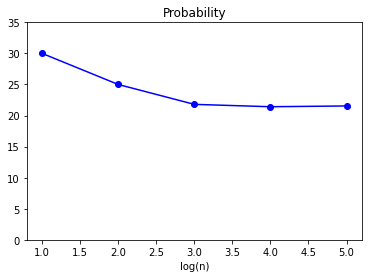

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.log10(ns), p, 'bo-')
plt.xlabel('log(n)')
plt.title('Probability')
plt.ylim((0, 35))
plt.show()

**更复杂的问题**：一张 $K$ 和一张 $Q$ 挨着或者最多只相隔一张牌的概率是多少？

这个问题求解析解非常麻烦，使用蒙特卡洛模拟更方便。我们可以重用大部分程序。

In [48]:
def MonteCarlo(n):
    res = 0
    for i in range(n):
        deck = copy.deepcopy(org_deck)
        random.shuffle(deck)
        if kingQueen(deck): res += 1
    return res / n * 100

def kingQueen(deck):
    n = len(deck)
    for i in range(n - 1):
        if deck[i][0] + deck[i+1][0] in ['KQ', 'QK']:
            return True
        if i != n - 2:
            if deck[i][0] + deck[i+2][0] in ['KQ', 'QK']:
                return True

In [50]:
ns = []
p = []

print("n\t|\tProbability")
print("----------------------------")
for n in range(5):
    ns.append(10 ** (n + 1))
    p.append(MonteCarlo(ns[n]))

    print('10^%d' % (n+1), '\t|\t %.4f' % (p[n]), '%')

n	|	Probability
----------------------------
10^1 	|	 80.0000 %
10^2 	|	 75.0000 %
10^3 	|	 74.3000 %
10^4 	|	 73.6900 %
10^5 	|	 73.7480 %


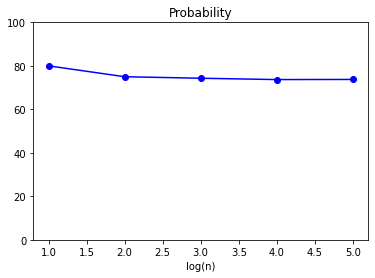

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.log10(ns), p, 'bo-')
plt.xlabel('log(n)')
plt.title('Probability')
plt.ylim((0, 100))
plt.show()